In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
%matplotlib inline

In [5]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [7]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [15]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

AttributeError: 'StringMethods' object has no attribute 'unique'

In [25]:
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [27]:
df['Classes'].unique()

array([0, 1])

In [29]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [31]:
X = df.drop("FWI",axis=1)
y=df['FWI']

In [43]:
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [45]:
y.dtype

dtype('float64')

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [49]:
X_train.shape

(194, 14)

In [53]:
X_test.shape

(49, 14)

In [55]:
X_train.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
day,1.000000,-0.011064,NaN,0.073450,-0.065199,0.055415,-0.081151,0.253737,0.499854,0.545880,0.200509,0.532115,0.240048,-0.009194
month,-0.011064,1.000000,NaN,-0.021475,-0.021522,-0.052803,0.003170,-0.007739,0.064715,0.129498,0.062550,0.084989,0.004097,-0.023492
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.073450,-0.021475,NaN,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.065199,-0.021522,NaN,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,0.055415,-0.052803,NaN,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.081151,0.003170,NaN,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.253737,-0.007739,NaN,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.499854,0.064715,NaN,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.545880,0.129498,NaN,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038


In [57]:
X_train.drop(['day', 'month', 'year'],inplace=True,axis=1)


In [61]:
X_test.drop(['day', 'month', 'year'],inplace=True,axis=1)

In [63]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


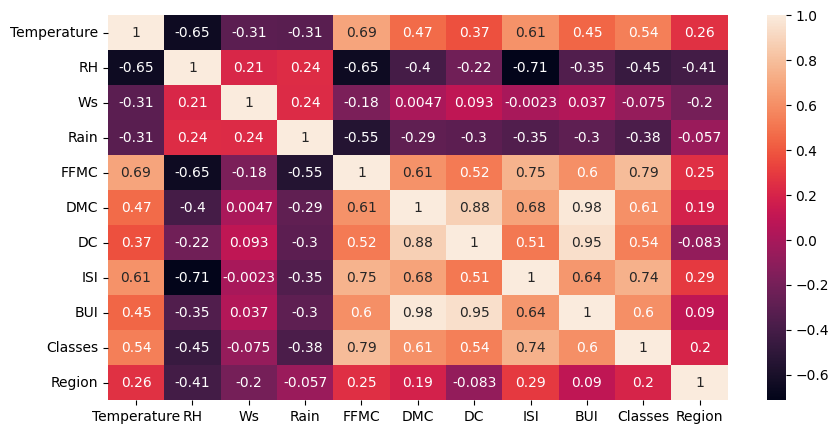

In [77]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [85]:
correl = X_train.corr()


        

In [89]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.653725,-0.308149,-0.313112,0.690285,0.468911,0.372163,0.613138,0.446280,0.539642,0.258344
RH,-0.653725,1.000000,0.211645,0.239441,-0.649239,-0.401836,-0.220945,-0.714640,-0.346511,-0.454926,-0.408441
Ws,-0.308149,0.211645,1.000000,0.235922,-0.176596,0.004712,0.092866,-0.002300,0.037465,-0.075322,-0.202357
Rain,-0.313112,0.239441,0.235922,1.000000,-0.547864,-0.288538,-0.301110,-0.349903,-0.299179,-0.378585,-0.057382
FFMC,0.690285,-0.649239,-0.176596,-0.547864,1.000000,0.611978,0.519513,0.751819,0.598248,0.786012,0.254770
DMC,0.468911,-0.401836,0.004712,-0.288538,0.611978,1.000000,0.876122,0.679049,0.983891,0.606775,0.188980
DC,0.372163,-0.220945,0.092866,-0.301110,0.519513,0.876122,1.000000,0.512934,0.946181,0.538893,-0.083038
ISI,0.613138,-0.714640,-0.002300,-0.349903,0.751819,0.679049,0.512934,1.000000,0.637669,0.740072,0.291889
BUI,0.446280,-0.346511,0.037465,-0.299179,0.598248,0.983891,0.946181,0.637669,1.000000,0.602102,0.090326
Classes,0.539642,-0.454926,-0.075322,-0.378585,0.786012,0.606775,0.538893,0.740072,0.602102,1.000000,0.196276


In [91]:
correl.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [95]:
correl.iloc[2][0]

C:\Users\bhara\AppData\Local\Temp\ipykernel_7424\2924255605.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correl.iloc[2][0]


-0.308149137842356

In [103]:
def multicollremov(correl,threshold):
    mcset=set()
    for i in range(len(X_train.columns)):
        for j in range(i):
            if abs(correl.iloc[i][j])>threshold:
                mcset.add(correl.columns[i])
    return mcset

In [109]:
multicollremov(correl,0.8)

C:\Users\bhara\AppData\Local\Temp\ipykernel_7424\44801241.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(correl.iloc[i][j])>threshold:


{'BUI', 'DC'}

In [112]:
X_train.drop(['BUI', 'DC'],inplace=True,axis=1)
X_test.drop(['BUI', 'DC'],inplace=True,axis=1)

In [116]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

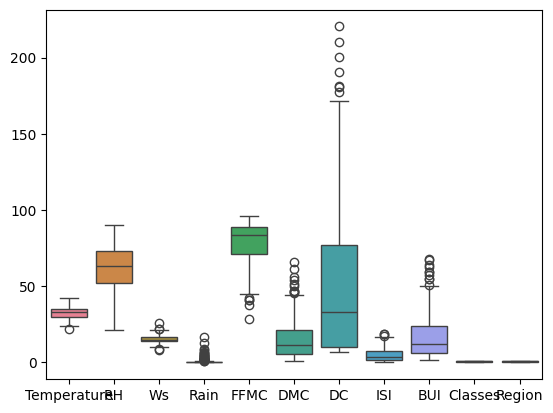

In [79]:
sns.boxplot(X_train)
plt.show()

In [118]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_trainscaled = ss.fit_transform(X_train)
X_testscaled = ss.transform(X_test)

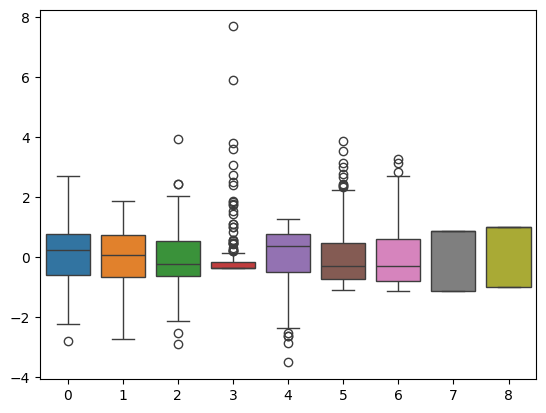

In [120]:
sns.boxplot(X_trainscaled)
plt.show()

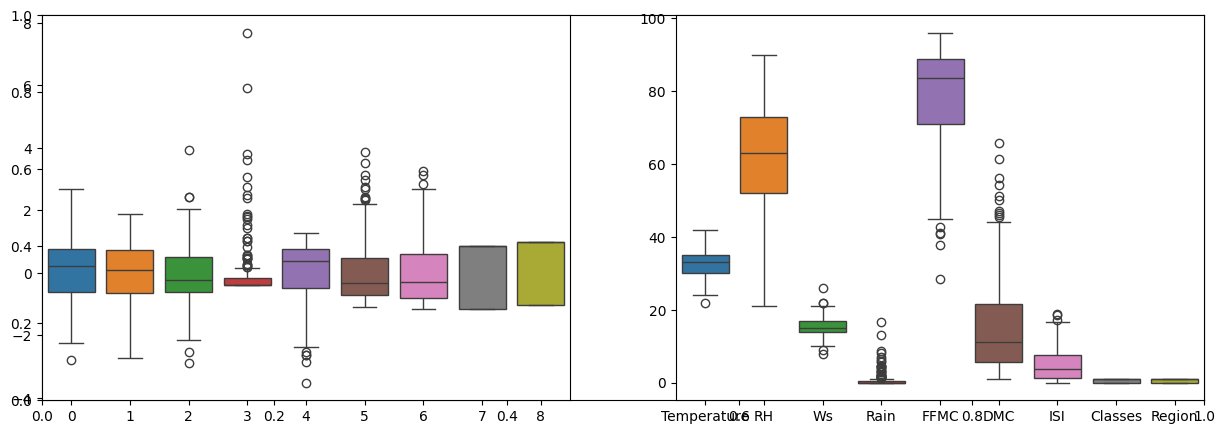

In [122]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(X_trainscaled)
plt.subplot(1,2,2)
sns.boxplot(X_train)
plt.show()

mae 0.504997869416568
mse 0.5882990110708672
rmse 0.7670065260940531
r2_score 0.9805895859259882
adj_r2_score 0.9796401634984551


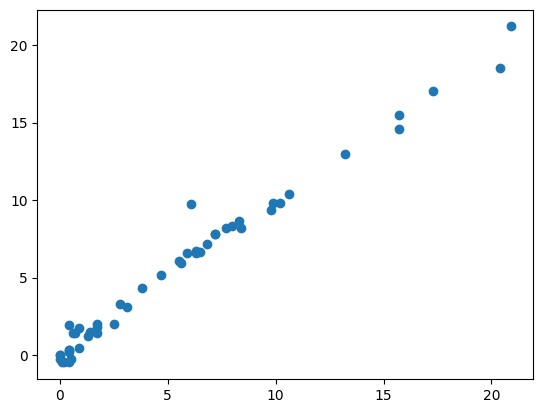

In [130]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


lr = LinearRegression()
lr.fit(X_trainscaled,y_train)
pred = lr.predict(X_testscaled)
print("mae",mean_absolute_error(y_test,pred))
#print("mape",mean_absolute_percentage_error(y_test,pred))
print("mse",mean_squared_error(y_test,pred))
print("rmse",np.sqrt(mean_squared_error(y_test,pred)))

print("r2_score",r2_score(y_test,pred))
r2=r2_score(y_test,pred)
n = X_train.shape[0]
p = X_train.shape[1]

adjr2 = 1 - ((1-r2)*(n-1) / (n-p-1))

print("adj_r2_score",adjr2)

plt.scatter(y_test,pred)

plt.show()



In [152]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model_dict = {"LinearRegression":LinearRegression(), "Lasso":Lasso(), "Ridge":Ridge(alpha= 0), "ElasticNet":ElasticNet(alpha=0.1), "RidgeCV":RidgeCV(), 
              "LassoCV":LassoCV(), "ElasticNetCV":ElasticNetCV()}

results = {"Model":[],"MAE":[],"MSE":[],"RSqd":[]}

for name,model in model_dict.items():
    model.fit(X=X_trainscaled,y=y_train)
    pred=model.predict(X_testscaled)
    results["Model"].append(name)
    results["MAE"].append(mean_absolute_error(pred,y_test))
    results["MSE"].append(mean_squared_error(pred,y_test))
    results["RSqd"].append(r2_score(pred,y_test))

    if name.str.contains("CV"): 
        print(name,name.str.

result_df = pd.DataFrame(results)

(result_df)


,Model,MAE,MSE,RSqd
0,LinearRegression,0.504998,0.588299,0.979899
1,Lasso,1.009396,1.726042,0.922390
2,Ridge,0.504998,0.588299,0.979899
3,ElasticNet,0.770088,0.983514,0.965621
4,RidgeCV,0.519205,0.602962,0.979348
5,LassoCV,0.555672,0.656837,0.977526
6,ElasticNetCV,0.571015,0.663710,0.977175
